# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed

In [2]:
medical = pd.read_csv('data/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram doesn't have symetric normal distribution. Rather, the data appears to have a right skewed distribution. the data has high variance with coefficient of variation (c.v.) of about 90%. In this case, median value is a bettter representative as the summary statistics.

In [5]:
mean = np.mean(medical.charges)
stdev = np.std(medical.charges, ddof = 1)
median = np.median(medical.charges)

print(f'mean = {mean:.2f}')
print(f'median = {median:.2f}')
print(f'std = {stdev:.2f}')
print(f'cv = {100*stdev/mean:.2f}%')

mean = 13270.42
median = 9382.03
std = 12110.01
cv = 91.26%


In [6]:
def optimum_hist_bin(data):
    '''calcualte the optiomum bin count for histogram using Freedman-Diaconis rule''' 
    
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    h = 2*iqr * len(medical)**(-1/3)
    bins = int((np.max(medical.charges)-np.min(medical.charges))/h)
    return bins

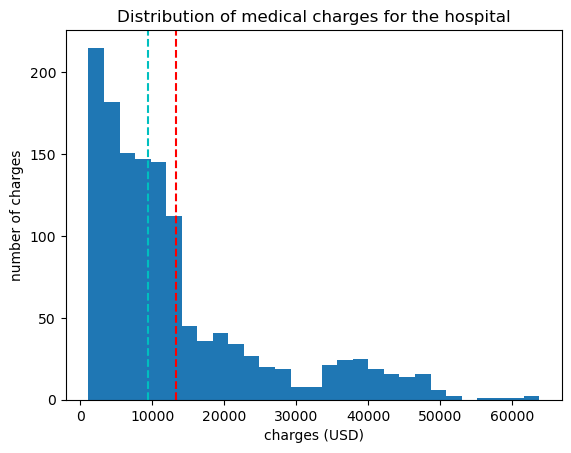

In [7]:
# optiomum bin count
bins  = optimum_hist_bin(medical.charges)
#plot histogram
_ = plt.hist(medical.charges, bins = bins)
_ = plt.xlabel('charges (USD)')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of medical charges for the hospital')
_ = plt.axvline(mean, color='r', linestyle = '--')
_ = plt.axvline(median, color='c', linestyle = '--')
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ the most probable mean value can be estimated using **bootstraming**. Based on **Central Limit Theorem (CLT)**, the distribution of sample means tends towards the form of a normal distribution with increasing sample size, almost regardless of the shape of the original data distribution.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 

**Hypotheis testing:** This is a large sammple test with $\sigma$ unkwon.

**Null hypothesis**:
\begin{equation}
H_{0}: \mu = \mu_{0}
\end{equation}
where $\mu$ is the population mean and $\mu_{0}$ is 12,000.

**Test Statistic**: 
\begin{equation}
z = \frac {\bar{x} - \mu_{0}} {s/\sqrt{n}}
\end{equation}
where $\bar{x}$ is the bootstrap sample mean, $s$ is the bootstrap sample stdev, and $n$ is the size of bootstap samples.

**Alternative hypothesis**:
\begin{equation}
H_{a}: \mu > \mu_{0}
\end{equation}

**Rejection Region**:
\begin{equation}
z > -z_{\alpha}
\end{equation}

**Test Result**:
The observed data do not support the null hypothesis that mean is eqaul to 12,000, and we accpet the alternative hypotheis that mean value is greater than 12,000. It means there is no statistical evidence that support admistartion's concern about revenue.

In [8]:
#define a function to calculate means of bootsrap resamples
def bootstrap(pop, n, N):
    ''' Calculate means of N bootsrap resamples of size n'''
    df = pd.DataFrame({'mean': [pop.sample(n, replace = True).mean() for i in range(N)]})
    return df

In [9]:
#run boostrap 1000 times for sample sizes of 100
n = 100
N = 1000
bootstap = bootstrap(medical.charges, n, N)

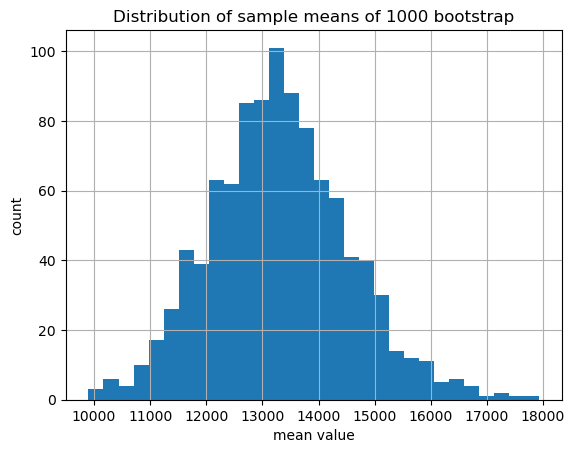

In [10]:
_ = bootstap['mean'].hist(bins=30)
_ = plt.xlabel('mean value')
_ = plt.ylabel('count')
_ = plt.title(f'Distribution of sample means of {N} bootstrap')

In [15]:
#calculate mean & std
bs_mean = bootstap['mean'].mean()
bs_std = bootstap['mean'].std()
print(f'bs_mean = {bs_mean:.2f}')
print(f'bs_std = {bs_std:.2f}')

bs_mean = 13303.72
bs_std = 1233.36


In [17]:
from scipy.stats import norm

#Calculate the (95%) margin of error
#find the critical value z-score (one-tailed 95%)
alpha = 1 - 0.05
z_alpha = norm.ppf(alpha)
print(f'z-score (95% one-tailed) = {z_alpha:1.2f}')

me = z_alpha * bs_std/np.sqrt(len(bootstap))

z-score (95% one-tailed) = 1.64


In [18]:
#Calculate the 95% Confidence Interval of the mean
ci = (bs_mean - me, bs_mean + me)
print("confidence interval (ci) = ({:.2f}, {:.2f})".format(*ci))

confidence interval (ci) = (13239.57, 13367.87)


In [20]:
#Calculate the (95%) margin of error (one-tailed 95%)
alpha = 0.05

#find the critical value z-score 
z_alpha = norm.ppf(alpha)

z = (bs_mean - 12000) / (bs_std / np.sqrt(len(bootstap)))

print(f'z_apla = {z_alpha}')
print(f'z = {z}\n')


z_apla = -1.6448536269514729
z = 33.42681976083783



In [158]:
Reject_Ho = '''
\nHo Is Rejected: The observed data don't support the Null Hypothesis. 
This means the observed data provides evidence that Ho is not True.
'''

Accept_Ho = '''
\nHa Is Rejected: The data don't provide evidence that the Null Hypothesis is not True.
'''

RR_z_test = z > -z_alpha

print(f'Alternative Hypothesis: {RR_z_test}')
print(f'p-value: {1- norm.cdf(z):0.8f}')

if RR_z_test:
    print(Reject_Ho)
else:
    print(Accept_Ho)


Ha: True
p-value: 0.00000000


Ho Is Rejected: The observed data don't support the Null Hypothesis. 
This means the observed data provides evidence that Ho is not True.



The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation*}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\tag{1}
\end{equation*}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}} \tag{2}
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

**Hypotheis testing:** Small comparison of Mean $\sigma_{1}$ and $\sigma_{2}$ Unkwon, but Equal (Pooled t-test)

Null hypothesis:  $ H_{0}: \mu_{1} - \mu_{2} = \Delta_{0} $

Test Statistic: 
$(Eq. 1)$

Alternative hypothesis:  $ H_{a}: \mu_{1} - \mu_{2} \neq \Delta_{0} $

Rejection Region: $|{t}| > t_{\alpha, v}$

Test Result: The observed data do not support the null hypothesis that mean is eqaul to 12,000, and we accpet the alternative hypotheis that mean value is greater than 12,000. It means there is no statistical evidence that support admistartion's concern about revenue.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Manual

In [175]:
#filter medical records for a) insurance claims, and b) no insurance claims
filt = medical['insuranceclaim'] == 1

insurance_claim = medical.charges.loc[filt]
no_insurance_claim = medical.charges.loc[~filt]

In [197]:
#summary stats for insurance claims
m1 = insurance_claim.mean()
s1  = insurance_claim.std(ddof = 1)
n1 = len(insurance_claim)
print(f'm1 = {m1:.2f}\t s1 = {s1:.2f}\t n1 = {n1:.0f}')

#summary stats for no insurance claims
m2 = no_insurance_claim.mean()
s2  = no_insurance_claim.std(ddof = 1)
n2 = len(no_insurance_claim)
print(f'm2 = {m2:.2f}\t s2 = {s2:.2f}\t n2 = {n2:.0f}')


m1 = 16423.93	 s1 = 14045.93	 n1 = 783
m2 = 8821.42	 s2 = 6446.51	 n2 = 555


In [204]:
# Calcuate Test Statisics
Sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2)/(n1+n2-2))
t_stats = ((m1-m2) - 0) / Sp*np.sqrt(1/n1 + 1/n2)

print(t_stats)

0.03661876613006809


In [205]:
from scipy.stats import t

alpha = 0.05/2
dof = n1 + n2 - 2
t_alpha_dof = t.ppf(q = alpha, df = dof)

print(t_alpha_dof)

-1.9617412190546961


In [206]:
#R.R.
RR_t_test = np.absolute(t_stats) > t_alpha_v

print(f'Alternative Hypothesis: {RR_t_test}')
print(f'p-value: {1 - t.cdf(t_val, dof):0.8f}')
   
if RR_t_test:
    print(Reject_Ho)
else:
    print(Accept_Ho)

Alternative Hypothesis: False
p-value: 0.48539723


Ha Is Rejected: The data don't provide evidence that the Null Hypothesis is not True.



In [207]:
#The data don't provide evidence that the people with insurance
#are charged a different amount to those without insurance.

__A:__ Built-in function

In [208]:
import scipy.stats
#This is a test for the null hypothesis that two independent samples have identical average (expected) values.
scipy.stats.ttest_ind_from_stats(m1, s1, n1, m2, s2, n2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=13.298031957975647, pvalue=1.1105103216309438e-37)

In [209]:
scipy.stats.ttest_ind(insurance_claim, no_insurance_claim, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

In [210]:
### I AM NOT SURE WHY I AM NOT GETTING SAME RESULTS!!!

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  

z-test views the averages of data sets that are different from each other but have the standard deviation of the population known, which is not the case for this scenario.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test